In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
# Load the data (now we know the exact path)
data = pd.read_csv('all_kindle_review.csv')

In [19]:
## Take data as two features 
df=data[['reviewText', 'rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [20]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns in dataset:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (12000, 2)

Columns in dataset: ['reviewText', 'rating']

First few rows:


,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [21]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
reviewText    0
rating        0
dtype: int64


In [22]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
             rating
count  12000.000000
mean       3.250000
std        1.421619
min        1.000000
25%        2.000000
50%        3.500000
75%        4.250000
max        5.000000


In [25]:
##Display the column names
print("Available columns in the dataset:")
print(df.columns.tolist())

# Display the first few rows to understand the structure
print("\nFirst few rows of the dataset:")
display(df.head())

Available columns in the dataset:
['reviewText', 'rating']

First few rows of the dataset:


,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


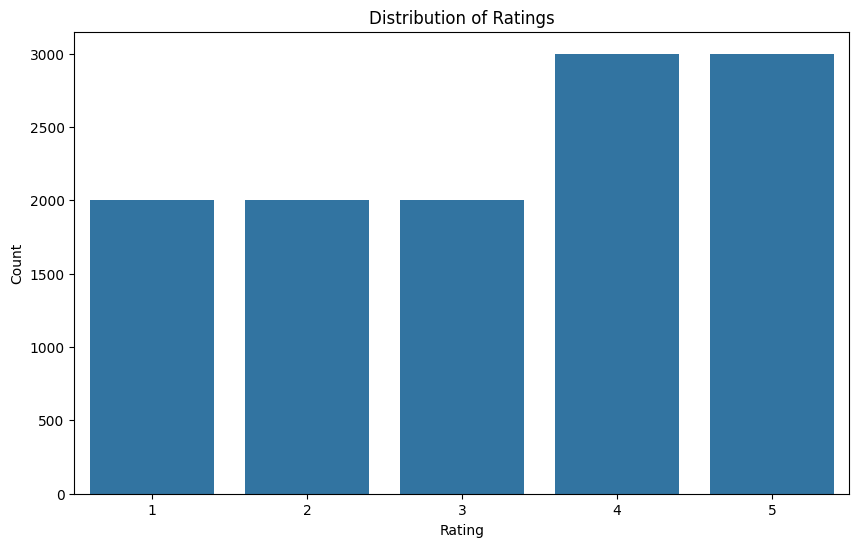

In [26]:
# Sentiment Distribution based on ratings
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\96653\AppData\Local\Temp\ipykernel_18244\1384704180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['reviewText'].str.len()


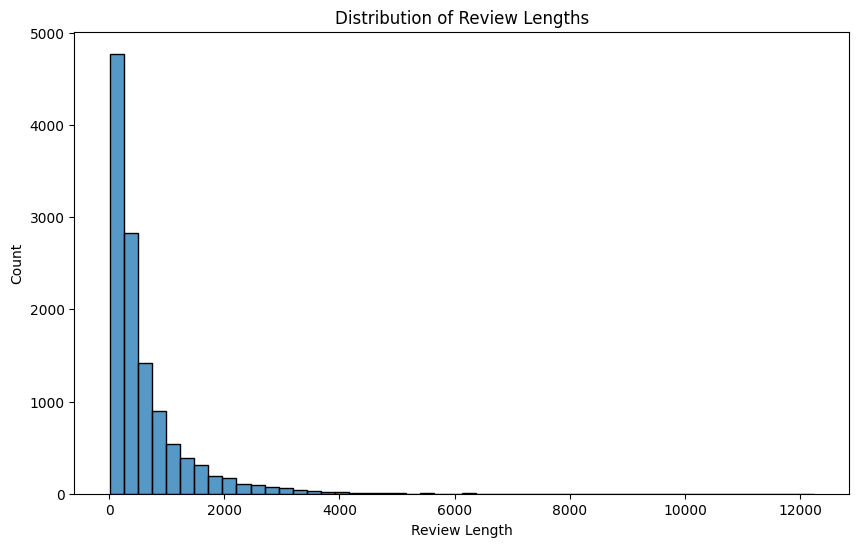

In [27]:
# Review Length Analysis
df['review_length'] = df['reviewText'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


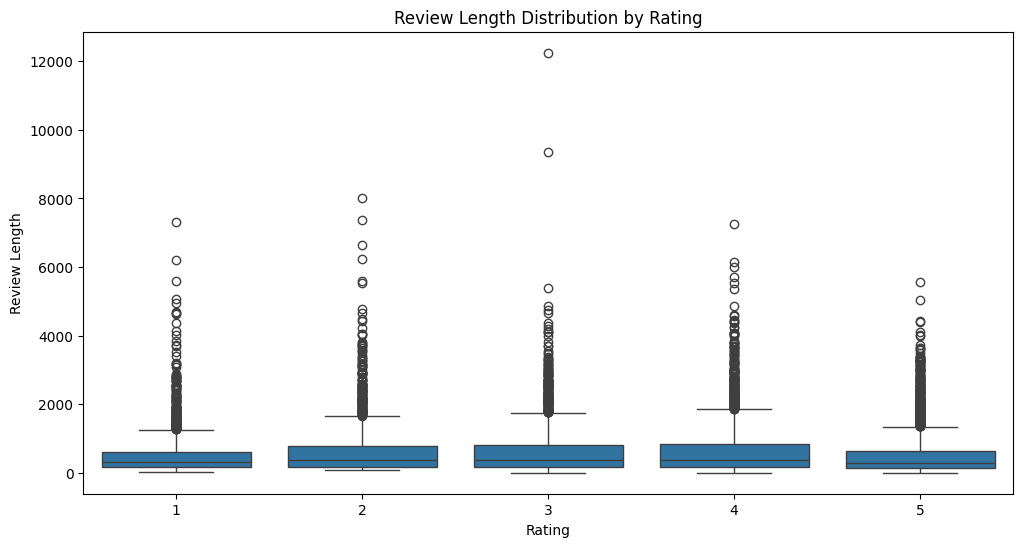

In [28]:
# Box plot of review lengths by rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='review_length', data=df)
plt.title('Review Length Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

In [29]:
# Convert ratings to sentiment categories
df['sentiment'] = pd.cut(df['rating'], 
                        bins=[0, 2, 3, 5], 
                        labels=['Negative', 'Neutral', 'Positive'])

C:\Users\96653\AppData\Local\Temp\ipykernel_18244\237349870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['rating'],


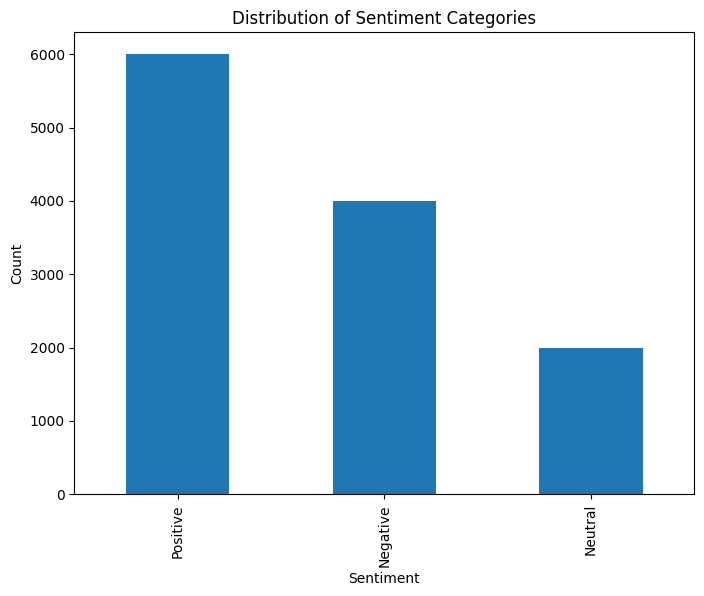

In [30]:
# Show sentiment distribution
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
# Print sentiment distribution statistics
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
Positive    6000
Negative    4000
Neutral     2000
Name: count, dtype: int64
